In [32]:
import os
import kaggle
from glob import glob

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
if not os.path.exists('./data'):
    os.makedirs('./data')

In [26]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('szrlee/stock-time-series-20050101-to-20171231', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231


In [324]:
folder_path = './data'
csv_files = glob(os.path.join(folder_path, '*.csv'))

dataframes = []

for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')
    dataframes.append(df)

stock_data = pd.concat(dataframes)

In [326]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195005 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    194931 non-null  float64
 1   High    194976 non-null  float64
 2   Low     194946 non-null  float64
 3   Close   195005 non-null  float64
 4   Volume  195005 non-null  int64  
 5   Name    195005 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 10.4+ MB


In [328]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,194931.000000,194976.000000,194946.000000,195005.000000,1.950050e+05
mean,88.587174,89.361487,87.790169,88.608609,1.976089e+07
std,115.438455,116.267449,114.476321,115.405112,3.388023e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,34.390000,34.720000,34.050000,34.400000,4.944100e+06
50%,61.230000,61.840000,60.650000,61.280000,9.558400e+06
75%,96.235000,97.060000,95.470000,96.290000,2.036730e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [330]:
stock_data[stock_data['Name'] == 'AAPL'].head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [336]:
stock_data.sort_index(inplace=True)
stock_data.set_index('Name', inplace=True, append=True)

In [418]:
stock_data.head(60)

Open    High     Low   Close     Volume  Weighted_Close
Date       Name                                                            
2006-01-03 AABA    39.69   41.22   38.79   40.91   24232729    9.913609e+08
           GS     126.70  129.44  124.23  128.87    6188700    7.975378e+08
           CSCO    17.21   17.49   17.18   17.45   55432166    9.672913e+08
           HD      40.39   41.45   39.77   41.24    8960100    3.695145e+08
           IBM     82.45   82.55   80.81   82.06   11715200    9.613493e+08
           CVX     57.25   59.10   57.06   59.08   13296500    7.855572e+08
           INTC    25.19   25.64   24.90   25.57   56409085    1.442380e+09
           JNJ     61.07   61.85   61.05   61.63   10703200    6.596382e+08
           JPM     39.83   40.36   39.30   40.19   12839400    5.160155e+08
           CAT     57.87   58.11   57.05   57.80    3697500    2.137155e+08
           KO      20.40   20.50   20.18   20.45   13640800    2.789544e+08
           MCD     34.29   34.29   33.20   33.52    9250100    3.100634e+08
           BA      70.40   70.60   69.33   70.44    4943100    3.481920e+08
           GOOGL  211.47  218.05  209.32  217.83   13137450    2.861731e+09
           MMM     77.76   79.35   77.24   79.11    3117200    2.466017e+08
           MSFT    26.25   27.00   26.10   26.84   79974418    2.146513e+09
           AAPL    10.34   10.68   10.32   10.68  201853036    2.155790e+09
           NKE     10.85   10.92   10.67   10.74   18468800    1.983549e+08
           PFE     23.65   23.92   23.60   23.78   38052400    9.048861e+08
           AXP     51.70   52.58   51.05   52.58    7825700    4.114753e+08
           PG      58.30   58.86   57.69   58.78    9741600    5.726112e+08
           TRV     44.85   46.00   44.52   45.99    3843800    1.767764e+08
           UNH     62.60   62.60   60.60   61.73    8070600    4.981981e+08
           MMM     77.76   79.35   77.24   79.11    3117200    2.466017e+08
           UTX     56.45   56.66   55.46   56.53    3716500    2.100937e+08
           VZ      30.20   30.47   30.04   30.38   12903800    3.920174e+08
           AAPL    10.34   10.68   10.32   10.68  201853036    2.155790e+09
           MRK     32.52   32.87   31.81   32.75   11430600    3.743522e+08
           KO      20.40   20.50   20.18   20.45   13640800    2.789544e+08
           DIS     24.08   24.48   24.00   24.40    9657400    2.356406e+08
           CVX     57.25   59.10   57.06   59.08   13296500    7.855572e+08
           MCD     34.29   34.29   33.20   33.52    9250100    3.100634e+08
           MRK     32.52   32.87   31.81   32.75   11430600    3.743522e+08
           JNJ     61.07   61.85   61.05   61.63   10703200    6.596382e+08
           MSFT    26.25   27.00   26.10   26.84   79974418    2.146513e+09
           NKE     10.85   10.92   10.67   10.74   18468800    1.983549e+08
           INTC    25.19   25.64   24.90   25.57   56409085    1.442380e+09
           PFE     23.65   23.92   23.60   23.78   38052400    9.048861e+08
           PG      58.30   58.86   57.69   58.78    9741600    5.726112e+08
           TRV     44.85   46.00   44.52   45.99    3843800    1.767764e+08
           IBM     82.45   82.55   80.81   82.06   11715200    9.613493e+08
           UTX     56.45   56.66   55.46   56.53    3716500    2.100937e+08
           UNH     62.60   62.60   60.60   61.73    8070600    4.981981e+08
           HD      40.39   41.45   39.77   41.24    8960100    3.695145e+08
           VZ      30.20   30.47   30.04   30.38   12903800    3.920174e+08
           WMT     46.36   46.66   45.57   46.23   23413900    1.082425e+09
           GS     126.70  129.44  124.23  128.87    6188700    7.975378e+08
           GOOGL  211.47  218.05  209.32  217.83   13137450    2.861731e+09
           AMZN    47.47   47.85   46.25   47.58    7582127    3.607576e+08
           AABA    39.69   41.22   38.79   40.91   24232729    9.913609e+08
           GE      35.10   35.40   34.80   35.37   33221400    1.175

<Axes: ylabel='Date-Name'>

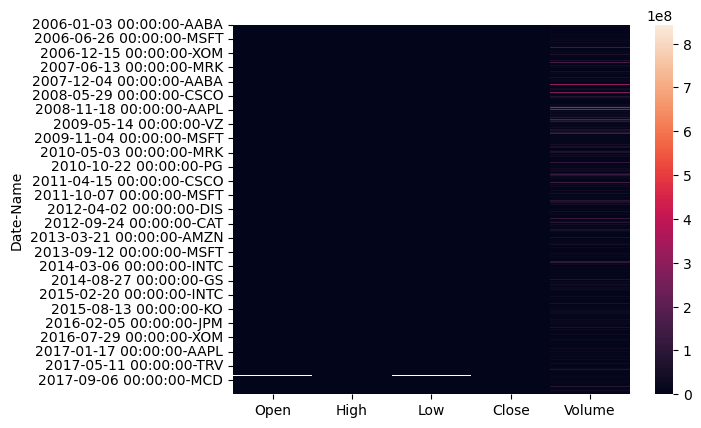

In [342]:
# without_name = stock_data.drop(columns='Name')
sns.heatmap(stock_data)

In [346]:
def calculate_market_index(df):
    df['Weighted_Close'] = df['Close'] * df['Volume']
    daily_index = df.groupby(level=0).apply(
        lambda x: x['Weighted_Close'].sum() / x['Volume'].sum()
    )
    return daily_index
some_data = stock_data
market_index = calculate_market_index(some_data)

In [348]:
market_index

Date
2006-01-03    32.435165
2006-01-04    32.864616
2006-01-05    32.291875
2006-01-06    32.788618
2006-01-09    32.773458
                ...    
2017-12-22    87.215191
2017-12-26    95.232294
2017-12-27    91.883561
2017-12-28    89.920680
2017-12-29    90.778624
Length: 3020, dtype: float64

In [350]:
# Calculate Percentage Change
market_index_pct_change = market_index.pct_change()

# Calculate Moving Averages
market_index_ma_5 = market_index.rolling(window=5).mean()
market_index_ma_10 = market_index.rolling(window=10).mean()

# Calculate Rolling Volatility (Standard Deviation of % Change)
market_index_volatility = market_index_pct_change.rolling(window=10).std()

# Combine all features into the market_index DataFrame
market_index = pd.DataFrame(market_index)  # Convert to DataFrame if it's a Series
market_index['Pct_Change'] = market_index_pct_change
market_index['MA_5'] = market_index_ma_5
market_index['MA_10'] = market_index_ma_10
market_index['Volatility'] = market_index_volatility

# Drop rows with NaN values (due to rolling calculations)
market_index.dropna(inplace=True)

# Display the updated market_index DataFrame
print(market_index.head())

                    0  Pct_Change       MA_5      MA_10  Volatility
Date                                                               
2006-01-18  29.303410   -0.033133  29.026597  29.974867    0.107358
2006-01-19  26.472939   -0.096592  28.911158  29.335699    0.110931
2006-01-20  33.285100    0.257325  30.004690  29.435021    0.140425
2006-01-23  29.845377   -0.103341  29.842883  29.140697    0.145074
2006-01-24  29.305537   -0.018088  29.642473  28.793905    0.145193


In [352]:
market_index.columns = ['Overall Trend'] + list(market_index.columns[1:])

In [354]:
market_index

,Overall Trend,Pct_Change,MA_5,MA_10,Volatility
Date,,,,,
2006-01-18,29.303410,-0.033133,29.026597,29.974867,0.107358
2006-01-19,26.472939,-0.096592,28.911158,29.335699,0.110931
2006-01-20,33.285100,0.257325,30.004690,29.435021,0.140425
2006-01-23,29.845377,-0.103341,29.842883,29.140697,0.145074
2006-01-24,29.305537,-0.018088,29.642473,28.793905,0.145193
...,...,...,...,...,...
2017-12-22,87.215191,-0.030153,89.732748,92.697523,0.038921
2017-12-26,95.232294,0.091923,89.964623,92.723749,0.050266
2017-12-27,91.883561,-0.035164,90.205954,92.812752,0.049665


In [398]:
# i don't know how this works but this seems to be the only function that removes the duplicates and doesn't reduce the date range
#////////////////////////////////////////////////////////////////////////////////////////////////

def calculate_ticker_features(df):
    # Remove duplicate indices to prevent double entries
    df = df[~df.index.duplicated(keep='first')]
    
    # Temporarily reset the index to work with Date/Name as columns
    df_reset = df.reset_index()
    
    # Group by Name (now a column) and calculate features
    features = []
    for ticker, group in df_reset.groupby('Name', as_index=False):
        # Sort by Date for accurate rolling calculations
        group = group.sort_values('Date')
        # Calculate features
        group_features = pd.DataFrame({
            'Pct_Change': group['Close'].pct_change(),
            'MA_5': group['Close'].rolling(window=5).mean(),
            'MA_10': group['Close'].rolling(window=10).mean(),
            'Volume_MA_5': group['Volume'].rolling(window=5).mean(),
        })
        # Add Date and Name to align with the original index
        group_features['Date'] = group['Date']
        group_features['Name'] = ticker
        features.append(group_features)
    
    # Rebuild the MultiIndex and ensure uniqueness
    combined = pd.concat(features)
    combined.set_index(['Date', 'Name'], inplace=True)
    return combined

some_data2 = stock_data
ticker_features = calculate_ticker_features(some_data2)

In [452]:
ticker_features.dropna(inplace=True)
ticker_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 93333 entries, (Timestamp('2006-01-17 00:00:00'), 'AABA') to (Timestamp('2017-12-29 00:00:00'), 'XOM')
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pct_Change   93333 non-null  float64
 1   MA_5         93333 non-null  float64
 2   MA_10        93333 non-null  float64
 3   Volume_MA_5  93333 non-null  float64
dtypes: float64(4)
memory usage: 3.2+ MB


In [454]:
ticker_features.head(15)

,,Pct_Change,MA_5,MA_10,Volume_MA_5
Date,Name,,,,
2006-01-17,AABA,0.005263,41.150,41.579,26959826.8
2006-01-18,AABA,-0.122912,39.590,41.006,47436189.4
2006-01-19,AABA,-0.024161,38.082,40.342,54381322.2
2006-01-20,AABA,-0.017186,36.652,39.563,62133322.6
2006-01-23,AABA,0.012745,35.506,38.659,62118938.6
2006-01-24,AABA,0.020486,34.458,37.804,59970221.2
2006-01-25,AABA,-0.010898,34.320,36.955,40993342.8
2006-01-26,AABA,0.019716,34.488,36.285,34505839.0
2006-01-27,AABA,-0.002275,34.758,35.705,27834693.4


In [464]:
if not os.path.exists('ticker_features.csv'):
    ticker_features.to_csv('ticker_features.csv')

if not os.path.exists('market_index.csv'):
    market_index.to_csv('market_index.csv')

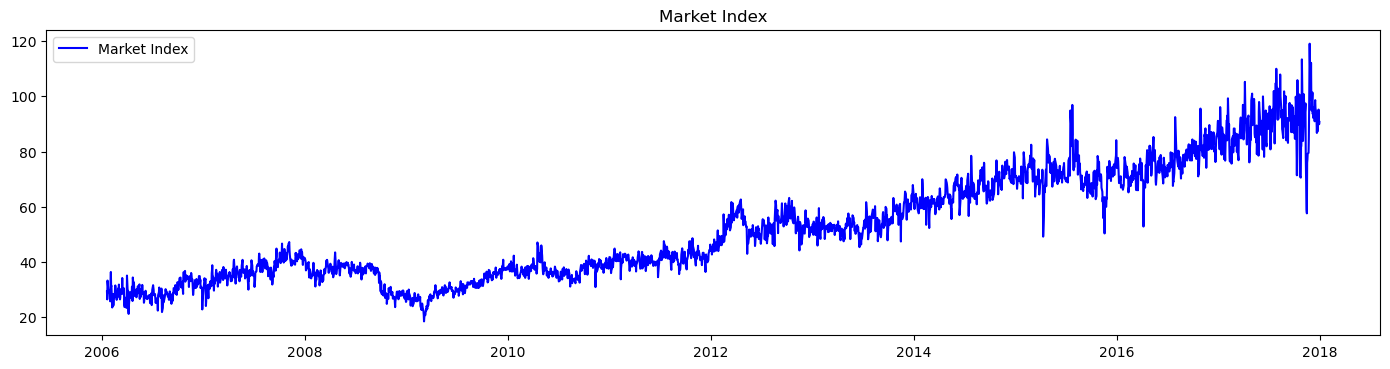

In [456]:
plt.figure(figsize=(14, 7))

# Market Index Plot
plt.subplot(2, 1, 1)
plt.plot(market_index['Overall Trend'], label='Market Index', color='blue')
# plt.plot(market_index_ma_5, label='5-Day MA', color='orange', linestyle='--')
# plt.plot(market_index_ma_10, label='10-Day MA', color='green', linestyle='--')
plt.title('Market Index')
plt.legend()

plt.tight_layout()
plt.show()

In [406]:
# Merge ticker_features with market_index_df
combined_data = pd.merge(ticker_features, market_index, on='Date', how='inner')

In [408]:
combined_data.head()

,Pct_Change_x,MA_5_x,MA_10_x,Volume_MA_5,Overall Trend,Pct_Change_y,MA_5_y,MA_10_y,Volatility
Date,,,,,,,,,
2006-01-18,-0.122912,39.590,41.006,47436189.4,29.303410,-0.033133,29.026597,29.974867,0.107358
2006-01-19,-0.024161,38.082,40.342,54381322.2,26.472939,-0.096592,28.911158,29.335699,0.110931
2006-01-20,-0.017186,36.652,39.563,62133322.6,33.285100,0.257325,30.004690,29.435021,0.140425
2006-01-23,0.012745,35.506,38.659,62118938.6,29.845377,-0.103341,29.842883,29.140697,0.145074
2006-01-24,0.020486,34.458,37.804,59970221.2,29.305537,-0.018088,29.642473,28.793905,0.145193


In [438]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93302 entries, 2006-01-18 to 2017-12-29
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pct_Change_x   93302 non-null  float64
 1   MA_5_x         93302 non-null  float64
 2   MA_10_x        93302 non-null  float64
 3   Volume_MA_5    93302 non-null  float64
 4   Overall Trend  93302 non-null  float64
 5   Pct_Change_y   93302 non-null  float64
 6   MA_5_y         93302 non-null  float64
 7   MA_10_y        93302 non-null  float64
 8   Volatility     93302 non-null  float64
dtypes: float64(9)
memory usage: 7.1 MB


In [442]:
combined_data['Target'] = combined_data['Overall Trend'].shift(-1)  # Next day's 'Overall Trend'
combined_data.dropna(inplace=True)  # Drop the last row (no target for it)

In [444]:
combined_data.head()

,Pct_Change_x,MA_5_x,MA_10_x,Volume_MA_5,Overall Trend,Pct_Change_y,MA_5_y,MA_10_y,Volatility,Target
Date,,,,,,,,,,
2006-01-18,-0.122912,39.590,41.006,47436189.4,29.303410,-0.033133,29.026597,29.974867,0.107358,26.472939
2006-01-19,-0.024161,38.082,40.342,54381322.2,26.472939,-0.096592,28.911158,29.335699,0.110931,33.285100
2006-01-20,-0.017186,36.652,39.563,62133322.6,33.285100,0.257325,30.004690,29.435021,0.140425,29.845377
2006-01-23,0.012745,35.506,38.659,62118938.6,29.845377,-0.103341,29.842883,29.140697,0.145074,29.305537
2006-01-24,0.020486,34.458,37.804,59970221.2,29.305537,-0.018088,29.642473,28.793905,0.145193,29.880674


In [470]:
if not os.path.exists('combined_data.csv'):
    combined_data.to_csv('combined_data.csv')